In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# 기본 폰트 설정: 한글 폰트를 'Malgun Gothic'으로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

# Matplotlib 설정
plt.rcParams['font.family'] = font_name       # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False    # 음수 기호 제대로 표시

# Jupyter Notebook에서 그림을 인라인으로 표시
%matplotlib inline

In [3]:
# # 1. Selenium WebDriver 설정
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriver 자동 설치 관리자
# import time

# # ChromeDriver 자동 설치 관리자를 사용하여 ChromeDriver 설치 및 설정
# service = webdriver.ChromeService(executable_path=ChromeDriverManager().install())
# chrome_options = webdriver.ChromeOptions()
# driver = webdriver.Chrome(service=service, options=chrome_options)

# # 2. 검색 쿼리 및 페이지 설정
# query = "비타민"                  # 검색할 제품의 쿼리
# p_size = str(80)                 # 한 페이지에 표시될 제품 수
# sort = "review&timestamp"       # 정렬 기준 (리뷰 많은순)

# # 3. 결과를 저장할 리스트 초기화
# name = []
# image = []
# link = []
# price = []
# pick = []
# major = []
# material = []

# # 4. 여러 페이지에 걸쳐 크롤링 수행
# for p_index in range(1, 51):
#     # 페이지 URL 구성
#     request_url = f"https://search.shopping.naver.com/search/all?pagingIndex={p_index}&pagingSize={p_size}&query={query}&sort={sort}&viewType=list"
    
#     # 페이지 열기
#     driver.get(request_url)

#     # 5. 스크롤을 끝까지 내리기 위한 설정
#     SCROLL_PAUSE_SEC = 1  # 스크롤 후 대기 시간 (초)
#     last_height = driver.execute_script("return document.body.scrollHeight")  # 현재 페이지의 전체 높이
#     before_location = driver.execute_script("return window.pageYOffset")  # 현재 스크롤 위치

#     while True:
#         # 페이지를 아래로 스크롤
#         driver.execute_script("window.scrollTo(0, {})".format(before_location + 500))
#         time.sleep(SCROLL_PAUSE_SEC)  # 대기 후
#         after_location = driver.execute_script("return window.pageYOffset")  # 새로운 스크롤 위치
        
#         # 스크롤이 더 이상 진행되지 않으면 반복 종료
#         if before_location == after_location:
#             break
#         before_location = after_location  # 이전 위치 갱신

#     # 6. 제품 정보 수집
#     for item in range(1, int(p_size) + 1):
#         try:
#             item_name = driver.find_element(By.XPATH, f'/html/body/div/div/div[2]/div[2]/div[3]/div[1]/div[2]/div/div[{item}]/div/div/div[2]/div[1]/a')
#             name.append(item_name.text)
#         except:
#             name.append(" ")

#         try:
#             item_image = driver.find_element(By.XPATH, f'/html/body/div/div/div[2]/div[2]/div[3]/div[1]/div[2]/div/div[{item}]/div/div/div[1]/div/a/img')
#             image.append(item_image.get_attribute('src'))
#         except:
#             image.append(" ")
        
#         try:
#             item_link = driver.find_element(By.XPATH, f'/html/body/div/div/div[2]/div[2]/div[3]/div[1]/div[2]/div/div[{item}]/div/div/div[2]/div[1]/a')
#             link.append(item_link.get_attribute('href'))
#         except:
#             link.append(" ")
        
#         try:
#             item_price = driver.find_element(By.XPATH, f'/html/body/div/div/div[2]/div[2]/div[3]/div[1]/div[2]/div/div[{item}]/div/div/div[2]/div[2]/strong/span[1]/span/em')
#             price.append(item_price.text)
#         except:
#             price.append(" ")
        
#         try:
#             item_pick = driver.find_element(By.XPATH, f'/html/body/div/div/div[2]/div[2]/div[3]/div[1]/div[2]/div/div[{item}]/div/div[1]/div[2]/div[5]/span[1]/span')
#             pick.append(item_pick.text)
#         except:
#             pick.append(" ")
            
#         try:
#             item_major = driver.find_element(By.XPATH, f'/html/body/div/div/div[2]/div[2]/div[3]/div[1]/div[2]/div/div[{item}]/div/div/div[2]/div[4]/div/a[1]')
#             major.append(item_major.text)
#         except:
#             major.append(" ")
        
#         try:
#             item_material = driver.find_element(By.XPATH, f'/html/body/div/div/div[2]/div[2]/div[3]/div[1]/div[2]/div/div[{item}]/div/div/div[2]/div[4]/div')
#             material.append(item_material.text)
#         except:
#             material.append(" ")

# # 7. 브라우저 닫기 및 드라이버 종료
# driver.close()
# driver.quit()

In [4]:
# # 데이터프레임 생성
# data_df = pd.DataFrame({
#     '이름': name,
#     '이미지': image,
#     '링크': link,
#     '가격': price,
#     '찜하기': pick,
#     '주요_기능성': major,
#     '원료명': material
# })

# # 공백을 NaN으로 변환하고, '이름','원료명' 열이 NaN인 행을 제거
# data_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
# data_df.dropna(subset=['이름','원료명'], inplace=True)

# # 인덱스 리셋 및 'index' 열 제거
# data_df.reset_index(drop=True, inplace=True)

# # 결과 출력 (디버깅용)
# data_df

In [5]:
# data_df.to_excel('./basic_df.xlsx', index=False)

In [6]:
# 엑셀 파일에서 데이터를 불러옵니다
df = pd.read_excel('./basic_df.xlsx')

# '원료명'에 '비타민'이 포함된 제품들만 필터링합니다
df = df[df['원료명'].str.contains('비타민', na=False)]

# '주요_기능성'에 '주요'가 포함된 제품들만 필터링합니다
df = df[df['주요_기능성'].str.contains('주요', na=False)]

# '주요_기능성'에서 필요없는 문자열을 제거합니다
df['주요_기능성'] = df['주요_기능성'].str.split('인증\) : ', 1).str[-1]

# '원료명'에서 필요없는 문자열을 제거합니다
df['원료명'] = df['원료명'].str.split('고시\) : ', 1).str[-1]

# 결과를 확인합니다
df

,이름,이미지,링크,가격,찜하기,주요_기능성,원료명
0,"고려은단 멀티비타민 올인원 60캡슐, 3개",https://shopping-phinf.pstatic.net/main_832809...,https://cr.shopping.naver.com/adcr.nhn?x=FoLuk...,"64,900",1만,영양보충,"비타민A, 비타민D, 비타민E, 비타민K, 비타민B1, 비타민B2, 비타민B6, 비..."
1,고려은단 멀티비타민 올인원 1560mg x 60캡슐,https://shopping-phinf.pstatic.net/main_254143...,https://cr.shopping.naver.com/adcr.nhn?x=VGGdp...,"4,790","1,737",영양보충,"비타민A, 비타민D, 비타민E, 비타민K, 비타민B1, 비타민B2, 비타민B6, 비..."
4,얼라이브 원스데일리 멀티/포맨/ 우먼 60정 비타민B군 미네랄 종합영양제,https://shopping-phinf.pstatic.net/main_100951...,https://cr.shopping.naver.com/adcr.nhn?x=fJ4x4...,"23,900",465,영양보충,"비타민A, 비타민D, 비타민E, 비타민K, 비타민B1, 비타민B2, 비타민B6, 비..."
5,센트룸 종합비타민 멀티 미네랄 포 우먼 50+투명 실버 알약케이스 코스트코,https://shopping-phinf.pstatic.net/main_119273...,https://cr.shopping.naver.com/adcr.nhn?x=IXm1A...,"24,820",171,영양보충,"비타민A, 비타민D, 비타민E, 비타민K, 비타민B1, 비타민B2, 비타민B6, 비..."
7,오쏘몰 이뮨 멀티비타민 미네랄 (액상 20ml + 정제 919mg) x 30개입,https://shopping-phinf.pstatic.net/main_290271...,https://cr.shopping.naver.com/adcr.nhn?x=D9gy3...,"77,390",801,영양보충,"비타민A, 비타민E, 비타민B6, 비타민C, 베타카로틴, 나이아신, 판토텐산, 엽산..."
...,...,...,...,...,...,...,...
1856,솔가 네이처바이트 종합비타민(30정/1개월),https://shopping-phinf.pstatic.net/main_824272...,https://cr.shopping.naver.com/adcr.nhn?x=Tg4k9...,"14,000",67,영양보충,"비타민A, 비타민D, 비타민E, 비타민B1, 비타민B2, 비타민B6, 비타민B12,..."
1858,세노비스 트리플러스 50+(90캡슐),https://shopping-phinf.pstatic.net/main_830219...,https://cr.shopping.naver.com/adcr.nhn?x=pD27i...,"30,890",14,영양보충,"비타민A, 비타민D, 비타민E, 비타민B1, 비타민B2, 비타민B6, 비타민C, 나..."
1859,홀리데이즈 멀티비타민 앤 미네랄 포맨 850mg x 90캡슐,https://shopping-phinf.pstatic.net/main_416424...,https://cr.shopping.naver.com/adcr.nhn?x=GDmeC...,"12,900",NaN,영양보충,"비타민A, 비타민D, 비타민E, 비타민B1, 비타민B2, 비타민B6, 비타민C, 나..."
1860,센트룸 포 맨 멀티비타민 종합비타민 대용량 코스트코 영양제 / 112정,https://shopping-phinf.pstatic.net/main_819614...,https://cr.shopping.naver.com/adcr.nhn?x=OqG1K...,"32,950",3,영양보충,"비타민A, 비타민D, 비타민E, 비타민K, 비타민B1, 비타민B2, 비타민B6, 비..."


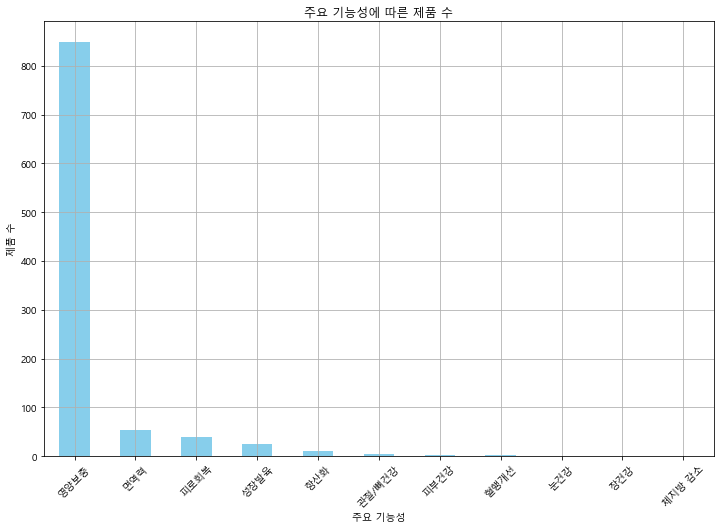

In [7]:
# 주요 기능성에 따른 제품 수 계산
functionality_counts = df['주요_기능성'].value_counts()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
functionality_counts.plot(kind='bar', color='skyblue')
plt.xlabel('주요 기능성')
plt.ylabel('제품 수')
plt.title('주요 기능성에 따른 제품 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
selection=input('주요 기능성을 선택하세요. 1.영양보충 2.피로회복 3.항산화 4.면역력 5.성장발육 6.피부건강 7.관절/뼈건강 8.체지방 감소 9.혈행개선 10.장건강 11.눈건강\n')
if selection =='1':
    filtered_df = df[df['주요_기능성'] == '영양보충']
    print('입력한 주요 기능성: 영양보충')               
elif selection =='2':
    filtered_df = df[df['주요_기능성'] == '피로회복']
    print('입력한 주요 기능성: 피로회복')               
elif selection =='3':
    filtered_df = df[df['주요_기능성'] == '항산화']
    print('입력한 주요 기능성: 항산화')               
elif selection =='4':
    filtered_df = df[df['주요_기능성'] == '면역력']
    print('입력한 주요 기능성: 면역력')               
elif selection =='5':
    filtered_df = df[df['주요_기능성'] == '성장발육']
    print('입력한 주요 기능성: 성장발육')               
elif selection =='6':
    filtered_df = df[df['주요_기능성'] == '피부건강']
    print('입력한 주요 기능성: 피부건강')               
elif selection =='7':
    filtered_df = df[df['주요_기능성'] == '관절/뼈건강']
    print('입력한 주요 기능성: 관절/뼈건강')               
elif selection =='8':
    filtered_df = df[df['주요_기능성'] == '체지방 감소']
    print('입력한 주요 기능성: 체지방 감소')               
elif selection =='9':
    filtered_df = df[df['주요_기능성'] == '혈행개선']
    print('입력한 주요 기능성: 혈행개선')               
elif selection =='10':
    filtered_df = df[df['주요_기능성'] == '장건강']
    print('입력한 주요 기능성: 장건강')               
elif selection =='11':
    filtered_df = df[df['주요_기능성'] == '눈건강']
    print('입력한 주요 기능성: 눈건강')               
else:
    print('올바른 선택지를 입력해주세요.')
    
nutrients=input('원하는 원료들을 들을 입력하세요 (예: 비타민A,비타민D)\n')
nutrients_list=[nutrient.strip() for nutrient in nutrients.split(',')]
print('입력한 원료들:',nutrients_list)

주요 기능성을 선택하세요. 1.영양보충 2.피로회복 3.항산화 4.면역력 5.성장발육 6.피부건강 7.관절/뼈건강 8.체지방 감소 9.혈행개선 10.장건강 11.눈건강
1
입력한 주요 기능성: 영양보충
원하는 원료들을 들을 입력하세요 (예: 비타민A,비타민D)
비타민A, 비타민D
입력한 원료들: ['비타민A', '비타민D']


In [9]:
# 원료 유사도 계산을 위한 함수 정의
def calculate_similarity(product_nutrients, user_nutrients):
    # TF-IDF 벡터화를 위한 TfidfVectorizer 객체 생성
    vectorizer = TfidfVectorizer()
    
    # 각 제품의 영양소 정보를 텍스트 형태로 변환하여 corpus 리스트에 저장
    corpus = [' '.join(nutrients) for nutrients in product_nutrients]
    
    # 사용자가 원하는 영양소 정보도 텍스트 형태로 변환하여 추가
    X = vectorizer.fit_transform(corpus + [user_nutrients])
    
    # TF-IDF 행렬을 이용하여 코사인 유사도 계산
    similarities = cosine_similarity(X[:-1], X[-1:])
    
    # 유사도 결과를 1차원 배열(flatten)로 반환
    return similarities.flatten()

# 각 제품에 대한 유사도 점수 계산
filtered_df['유사도'] = filtered_df['원료명'].apply(lambda x: calculate_similarity([x.split(', ')], ' '.join(nutrients_list)))

# 유사도에 따라 제품 정렬
filtered_df = filtered_df.sort_values(by='유사도', ascending=False)

# 상위 매칭 제품 출력
for index, row in filtered_df.iterrows():
    print(f"이름: {row['이름']}")
    print(f"찜하기: {row['찜하기']}")
    print(f"가격: {row['가격']}")
    print(f"유사도: {row['유사도'][0]:.2f}")  # 첫 번째 영양소 리스트와의 유사도 출력
    print(f"이미지: {row['이미지']}")
    print(f"링크: {row['링크']}")    
    print()

<ipython-input-9-9e9e21641c1a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['유사도'] = filtered_df['원료명'].apply(lambda x: calculate_similarity([x.split(', ')], ' '.join(nutrients_list)))


이름: 꾸미바이트 비타민 3종 택2 (비타민/칼슘/아연)
찜하기: 46
가격: 30,000
유사도: 0.71
이미지: https://shopping-phinf.pstatic.net/main_8433602/84336026099.7.jpg?type=f140
링크: https://cr.shopping.naver.com/adcr.nhn?x=wV6IZ3tzRmEUOVLQKvi2Nv%2F%2F%2Fw%3D%3DssyjcLz4S2mxeh8ByZqnw%2FLYYmHDmkvzeuvggg0MeQFDuUPZi0FSS96t3pyRLyNoL4FYIXUDs8Ko9b9nN9BN8C%2Bhma5Hs5%2F2boYl%2BrKrxGh56%2FmRRfbNO1Az4dVgna0oBmlfV10sywUpLcCPPYiyCsGFEV98CfAwi%2FgpsOD1fQ6AOYZ%2BfIXAZX1YuSRx8xCrnXCAZR0UWm7upyQAu1MjziiH%2FjCNLZxgNaMyMsMJVM8v%2BfeKKLwwWZhwcnGZVPyjsB7P9jx5KZr1oy9qstZx7m%2BCkorzN2IHsIr6OV%2BFIuaIkQHabeg%2BMze6VJpW%2BD5Lbx72P1MzfeDsyK%2BcBtz34gODEdZZlcdjo4SbRwweDIGqN8cJDolwlcmTopzjBq9YXzLOb0ptb5NyvX5bK8NjpiKQEu%2BnCmIsPL1HPHoEtWz9vv7ETJ7iXZnWdcxOmJNIUU1WOcdcBveoc0aIQVayApTGpdrNmvTZKVy%2BW4x7q1fYUYHn8BdFh16K0q1OwbJSMv9dXni7EX9rwmi%2FWJwfUnWmUKLPRPnhBnwVUzQryXuFI4HWn3E7G0hS0NHNsK6fmmeNJVHIh%2Fr3t6mPqnAhPLoir%2BPcRGiWNNGThL%2FtCOjcdHI8FZtQVGFZJxOyBDKc%2B&nvMid=84336026099&catId=50002425

이름: 릴크리터스 꾸미바이트 어린이비타민 종합 키즈 젤리 꾸미베어스 칼슘비타민D 60구미 1병
찜하기:

링크: https://cr.shopping.naver.com/adcr.nhn?x=cKIpkQCNsH8Z6bzsVvqQo%2F%2F%2F%2Fw%3D%3Ds8XJYFtGzX3yVBbieB8N0WHw20SgMo1DxLL27ySbxqr2f99ETEvSiWmG8P40kbpSxJtFij5yZ9f4r62pvG1rbhigVPTvZrB8yMxSMvC4HYJik1rDumlQJK1BJmNFT1pmlfqBhww4GHw62vzob8%2Bcdp8v%2BjB2erv%2BZ%2Brrs5VHOiTQgGE7%2BZatKjf5hEf1XctkKk5UIA3QSIWy8q9j%2F5nQ213%2B3JLryITQ8A%2BVL%2BXA2n3%2Fy4hRuuc7qeM0GhmCCDnEmKRqTlfDprJEWE8DyR9vNWn8LSirPVFw9G%2FrjJAGwSkek6v2w9jBqMGR4TTsgYaQnlII%2ByYYqWVu3SSXxcjEJdB8hjWGUKJ%2FhUVAw9zg7IsJQvCL0vjT7BDyew%2BppTYv%2BQPzC48nXXQqiits9EDrhlALhgvbJp3F1YVrHMHnaXk1LXcv9Az4Jm6rquko58j6DEq3a%2FZFg%2FGe94jYngrHkXC%2Fd0FicLZ5Mp9tRcxtA4aNAM%2BjWSSVii6MBNFVVrsZAjqKz2xHsbQLBkYIz09aIlKOuInwfQ1XmfH35WvRpRXYOQMbbXPjQ54U2YUhika5DUifW28Kgwl3L1gfO6k2AchGk4XMJtozo5T3u6g%2BJ%2BOswTa76MdAD0HDhaziWzMLTZKxhyTDaCQGOaTfhcdsAxeR79U%2F6Az3gE9mQ%2Flgn57E%3D&nvMid=21444513537&catId=50002425

이름: 덴프스 트루바이타민 X 엑스 공유 종합비타민 멀티비타민 30포 3박스
찜하기: 45
가격: 60,900
유사도: 0.32
이미지: https://shopping-phinf.pstatic.net/main_8253297/82532975269.1.jpg?type

가격: 16,500
유사도: 0.29
이미지: https://shopping-phinf.pstatic.net/main_8249747/8249747564.6.jpg?type=f140
링크: https://cr.shopping.naver.com/adcr.nhn?x=Edmz7OWb0TfzwocYJe23BP%2F%2F%2Fw%3D%3DsNuIx0weZN5S6F1F8g5YJNzXm8FcUPgby47BTGZGJWuCf99ETEvSiWmG8P40kbpSxV%2BniRNIzVlAsjYMUGF7f8P9tjp9%2BDzCKxpxgyJsSuBzLBF3oCMEPgveC9m8JbSSqnVUia60%2BCPWY3wQurcTalruVw3GdaDAvxDSjC3cnt2Z%2F22ms%2BW8TiQQNz%2FOHMMFFsZYv9wXws8nyhO0fENpnYcq0Pawj39mDe%2BDVrNvPn84SgG543iBGtwkEWfxQ1tCnEIZJB1yuP5kkcuYnGBP9uwVt%2Bq%2BEGbIURH4Pt76u0TYKjEp449Veflhn%2Fvm6a62AIKv4Q6E%2BB84yfj6y1WhCWbY9q4udK3%2BZvQ%2BByHf%2BTShKjzB54V0zb%2FFx%2FfNMpuxHIR6bXUrzs6JB5I6Wumn4iH93B2NAfZhtPDfYbZfpf9v9uuy%2FVSRs2ZZMPGGRcNp7zxQ%2FYbL0wiOr9oLhmCI230DQpQJWIsXO%2FRTKLdiCfyCCCaH%2FITwDoT%2FzMc2Sbva%2FwE9ngm2ckWLRTeRPIdQyEil%2BbxoEBDfNmv3xwemsE1x9rsqXtuz11NXmXvb5CR%2FCPVzPTrxslHIPszD%2FVYe%2B%2FoI8ppzMDTWNCoR1FIjE2sozTZu%2FSo5Ft%2FXVPZlRAz5NXXnyTnx3DkiBd%2FdNnyAPS2hopkeKUdu5q4dSKA0zkoA%3D&nvMid=8249747564&catId=50002425

이름: 베러데이 키즈데이 포도맛 1100mg x 90캡슐
찜하기

링크: https://cr.shopping.naver.com/adcr.nhn?x=1GOQo5rIw4a1dpQqPdQTP%2F%2F%2F%2Fw%3D%3DsL6btDLvdjO%2BvlPBqNOCV1i%2F1zDRi5BlRWhLxKpbcffyf99ETEvSiWmG8P40kbpSxSlysFKYp5Phf9YcksRp54vtcP%2BkelWQz1AeRH9XinbUGcewJrIeKamqeVPxVobwLrhHWGxfBkE3D5V67sUZ3FWvqR2unsG9Pw6XBns%2FftjJGNMg26%2F%2B4Y8kgsfd5XyPZhvXisP%2FcPvcoh%2FZfkTkSSLa%2BNcxSVqG0ZvAhI6F%2BBqcjr6jhyj5ZOczN39NbHEMDP2tfKoQ0NQPyiad34AQ6K9%2FdVvwtcOUlbNrGLU3RUnox7hpi8QtIe1df3hv3rm0XM1gotoxgcmLxkKNVQ45LDkVMybsytQMQ%2FGLYAlhkiYDHV%2FajByMlk%2BTeKmN0R2PR6xvD5XsXBVFTpjGrFbAma9H5%2BsWJB5MHaYJR4WEJH4Fhvzwt1vjcrY6q%2F7nvJFQ2Hbml2bUKLKOAwWvj7Wlxsi2RBpWBL6ZHD%2BIKCXunFscdL7i2MOWbtwBYPyQeMcBtcUS%2FgrKLXoRf%2F5xn63HFoqlbEUY0HW9txOly6czEUW4z4jNDGWhA%2FBQZeXY2DvKDIScsr5OMC34iQEK1SJULmCjj2iEKXD7FbqN4iRgs8f2cBPRIcA3je6ElBr8w2%2BVyt94NMlzc1fd67cKw7Wp5DA%3D%3D&nvMid=82162349767&catId=50002425

이름: [세노비스] 트리플러스 맨 멀티비타민미네랄 오메가 3 (90캡슐/45일분) + 트리플러스 우먼 멀티비타민미네랄 오메가 3 (90캡슐/45일분)
찜하기: 5
가격: 58,600
유사도: 0.29
이미지: https://shopping-phinf.pstatic.net/main_8227940/8227

이름: 멀티비타민 젤리빈 150구미 츄어블 어린이 종합영양제
찜하기: 4
가격: 28,900
유사도: 0.29
이미지: https://shopping-phinf.pstatic.net/main_8285009/82850099666.5.jpg?type=f140
링크: https://cr.shopping.naver.com/adcr.nhn?x=Ef36QLAaPexYOHLKW%2BEvFf%2F%2F%2Fw%3D%3Dsdm2XzPucxjYa2ZjdY3BOFNQgKjUec4ZPJntUNgy1s6VIT592maX5cldmIf1%2Bi0tVycB4fEG24kqS9YozVmzeOp%2FPKbSaee6Uvl19IJ5Y1b3%2BWPhvTUQoMx3PO8aTmDbyjke%2Brm0GSTqZXOlLn%2BlJOj9rXyqENDUD8omnd%2BAEOitqNZuGiYkpsV%2F1UFv2sMKhVfVyLovMpjIfvBDJOEsJzbWuQ8y1KAZJ4d7bKuLMQ%2FDmAiw2sf7caNyGaAVSbEX9gGwmPNX%2Fe%2BXkuZ30duRQYj%2FN1gL%2FBgCKENDMCz1nm%2F2j44gfaEq%2FQLyUgUxjEdcWm96mTDaIHJAUELpleYLJnU1Cf5qep%2FpeeHxP54KZhvvgtShxJQl1eHHvrHKdCf6ojB5%2BwQwTWqlzZqCmwHkzLwTy1skeNdSnE5M6Ot1Dz3fYVXQ8n06M8lPJDdCCt7wYqaQGr%2F%2FAYMJ0bg2oeNttWfflH%2BVIckVsyVpuO3rczYjCw553A9Yt74Ef5SN2Zj1RlVhii3XR3dAwpjBCaOD1268jwpi2w8En1Prbbh8sNCBYhMWRFMTmfMT17idCe%2BSUNeAFferyjw4ZhQHAXhok%2FeupQm%2FKLnQBbK5LDXLAaCgHqVpzsiJpfZiPIV%2FLIzRPWsl5%2Bg4luaQ7gEP1gxuYzQ1QmAmnoJRdq4K9btjkCM0%3D&nvMid=82850099666&catId=50002425

이름

이름: 뉴트키즈타민 어린이 비타민 영양제 / 종합 유아 아기 / 아연 30포(1개월분)
찜하기: 232
가격: 32,000
유사도: 0.29
이미지: https://shopping-phinf.pstatic.net/main_8242249/82422497535.2.jpg?type=f140
링크: https://cr.shopping.naver.com/adcr.nhn?x=knCx4O4JvMhtpaRolam4Y%2F%2F%2F%2Fw%3D%3Dsj5PfU3SXOUcbqSGMG%2FFKpzvwOthyFzsnm0lH%2BPHKco%2FuUPZi0FSS96t3pyRLyNoLLkwSDxDjoOWZxnEbbXfXYjhHl42eLU2LkHXF%2BXpJGXQ0R%2Fay0WvEAFtB2ZtLCXwhaHhv8DfmcRy%2B%2Bbg7zTND2GFEV98CfAwi%2FgpsOD1fQ6CLZg%2B836fvR7S%2FYhR6nHLLlj%2Bj37KqbsOl5WPD1W0Xc%2FfDt6EdxTV8ljOrcBuVjkcjr6jhyj5ZOczN39NbHEMDP2tfKoQ0NQPyiad34AQ6K9%2FdVvwtcOUlbNrGLU3RUnrro6eA4DEyUFeuzjvVZShTnwP6jzzFksvsVUXAYlSKt%2BHSXr1z7PYHArTJTdEUjH2bv2FTpBAguRe2f3B9w11Zw4eAz71BTJvjZE93%2B6O0MNKactE5WkWOGZzMrTC3K6iDUqM1R0k0h8vnlp6uKqW7vz2d5zf44kkAEzLgv2TRjc%2Fqax5RsXekUpliMB8RGOYnUB5eRjYA11%2FEMFqIhH9SuiKX2gw2ux2efptPQaG1OJB%2F8oFNo%2FuFa7AfPn4MQMRchJzqTjK2JU2UY79S2g74r3RVd17ptj0w08jzAo7LwHWIQ1u3zt0GFab5rzIWlsNP%2FECxWYiTxQ7Yrl6h1MroymLoMAIM9qNoP8xm%2Bf3JHossiSX6NYpcR8wHxOISpWudF%2BbF4n0ROYnD86ee1vuF&nvMid

링크: https://cr.shopping.naver.com/adcr.nhn?x=UqndIG8P1raGU6vI8K4BkP%2F%2F%2Fw%3D%3DstNBQLaJYEUkIl%2FHb3ISkHV8NHFEWA%2FMmC%2BNY4TwynGqf99ETEvSiWmG8P40kbpSxUFn116h0oKW3l9GDIvx7Pz0Ybam4FR7tVU4AWqnuYPMZumzysURxBGWBJ3iBZccF4%2BaEkct4Eqr9SfYAOK6m7AaArojxeSheKAssYLDn8wxmiBlGqhKanbyqtDqxgv6f8eefX0vh%2Fo3KJ5Goir2lWr6TnZFTJH%2FTm9r9kcXHQl9AngT8NS%2FLPALIExLABo2F%2BkWFMA4E43uhiigQYH8AgUkBBOLgYH04P4EEgoRyVZm54J8UO7LDGXdPU9Do8oyMXmq0wb8nQ9S1CNyVqQgAyIUbUC8yt76RXwPIIhH2OYM8FREg%2FU2%2FPYhJFrgspAzornfMhVHM8P%2BroJFKP2%2FXPRf0HyeEgE96g459NfVyV9jp%2BWgLGvZiZkHmgOfnw6DoyZ2G9yolHaY8Qq2gSmALdZgHzUxVFSWU5r02aMEVKRCImhEvs9m7Epir2Op45iFOXzUYxXw8a6MdOGz3nQUDiAG5ufmPblQEcLx7NWXOSnol3hZEEfvFxNjvTvaJSr0iqQCv41VfQdBTsc%2BsTzP%2BQfhXTPK0Agu6dD6QxGZtJBV0HlR7wtpu5PFnpX9t58eEiRV0hA8EPZYI2qbzcDm3JFtMbrYvbDJYOkdGU7z2vvvnKTR4CO7vmTCfem%2B2l1aV&nvMid=86819432651&catId=50002425

이름: 하이웰 키즈 멀티비타민 미네랄 1200mg x 60캡슐
찜하기: 6
가격: 19,990
유사도: 0.29
이미지: https://shopping-phinf.pstatic.net/main_2266575/22665753332.20240605120435.jp

찜하기: 69
가격: 33,900
유사도: 0.28
이미지: https://shopping-phinf.pstatic.net/main_8721400/87214003057.1.jpg?type=f140
링크: https://cr.shopping.naver.com/adcr.nhn?x=5QnrEULyKy78VNByhAyeg%2F%2F%2F%2Fw%3D%3DsvfF%2BBjRVc6kAGRXUUpZz1UnklKU2WvSfjNT13zgxh0lIT592maX5cldmIf1%2Bi0tVgXLH1E3rzNw3WhX%2B6Sd1glSBRl9svKjldM58wX005gX9dMtyimKQbYkt%2B5jg3yObfuJtlraaiu5%2BhV%2Fw9ZmpqkS%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOVukA07g1Q0RFAEGpEigqcCkak5Xw6ayRFhPA8kfbzVp%2FC0oqz1RcPRv64yQBsEpHpOr9sPYwajBkeE07IGGkJ5SCPsmGKllbt0kl8XIxCXRZK4iz6SBHfGq459PwE0j5h1Vpw2GdS6IC5rVRqt1hT6YnjArNp%2Bp1RpkdDXnCUmfmwWqSmgq4uz7iJZmGGadopH%2BMzWtQUdM5m9fwPwl6DJsAlZdV4ch9NjchaT5LWE5J9a9EBA97%2FMuydJRARUD4fnQhtSDsaH1PACjaPEWwGVJlFaabRyjn3Wca4UCYHnTHGxkJKWqK1V8SdTppJE8vqHvvYJnhTmGjhi%2BBTnEj7wd4eOs1ngyDsrBfwZJ6FpPFfP%2Fk%2BNj2zS5seV9BMQz4g%2BDNXhmWEBgZaxt3BMfY5zrlvC0CRT899n4Fosr3EW6QCU4rA9qEITJh30T6VqaOVWuY6%2B6nZ0X%2BMDIWt%2F2%2BIcWZAWd7eP13oamzY4QV9NEFYIwiY8CEKeW5NgFXvt3Ky1Vhq%2FH77x9Zlr1IFzyuow%3D%3D&nvMid=87214003057&catId=500

링크: https://cr.shopping.naver.com/adcr.nhn?x=nsIYRt%2B6sExGRv2y3l2W9v%2F%2F%2Fw%3D%3DsOSG0d4dJRBtLNkE4ir3cRcgUp34FI2UT848oqFGmQrJIT592maX5cldmIf1%2Bi0tV4VH8w6VYIw2KAAkP%2BRHv2SMC2y2Sdag13vl3HLoVcRc8%2Bwj60TGkclijGn8Z9Ldkv4NHJimu%2Fos9cuCUVpBtCd9%2BKy%2Fm0d%2BgYWHtEf61Jo5CNclKwvLyA%2Fys%2F%2FHPPajLQJO%2FExxxSOCFqzxobZ5TwcKIoOktX6X%2B0FXvfDXvsD2B%2BlI88iFymt9kmJbhsi7n%2BkWFMA4E43uhiigQYH8AgUkBBOLgYH04P4EEgoRyVZm54J8UO7LDGXdPU9Do8oyMXmq0wb8nQ9S1CNyVqQgAyNQUYyhW%2BuglOGQKZA3rMXqzaLo3YojXuQJMvdaZ%2BI%2FypieMCs2n6nVGmR0NecJSZ5dXC2k%2BQTbEXAlclSkCJiixyTNOpvF5JKAAUscSxRXpH4C7pKi6nxjUd9lHMYAlo7HMyqiw6DOiM%2BWZ8Lg4IoVe1%2BOkgc03T1Z0NF5grfL%2FH1OmhW3SVoFN2tul0xYqQGRiJLVRMM5k8p1W%2FzJAaJ0kdWxYCPoGNPpDncmrNYE0gXc6fw61qmY3%2BYMhr2NCb0dE3AqgcsXiyd7cRBZ7SQj1KxYf96CdOoAXx7WeI1n4b7jD62ptBsKqelQLJlgrMGhopkeKUdu5q4dSKA0zkoA%3D&nvMid=30144290618&catId=50002425

이름: 시너지 프로알지9 플러스 멀티비타민(신형) 30포 / 원팩
찜하기: 133
가격: 74,900
유사도: 0.13
이미지: https://shopping-phinf.pstatic.net/main_8321777/83217778742.1.jpg?type=f140

이름: [한판에 비타민+칼슘+루테인+알티지오메가3] 올인원 뉴트리션 멀티비타민 칼슘 마그네슘 1박스
찜하기: 691
가격: 34,900
유사도: 0.12
이미지: https://shopping-phinf.pstatic.net/main_8672219/86722191522.17.jpg?type=f140
링크: https://cr.shopping.naver.com/adcr.nhn?x=t%2FiyhnBQDuxsiqAUkyX7Wf%2F%2F%2Fw%3D%3DsLG%2BI7BPpFm%2FgPAjB9HtJrGCdyeZXbPxobiho%2BXyEyF1IT592maX5cldmIf1%2Bi0tVTkerUmB%2FOldW2I87WCRYUm1LsvDkITFS%2F22Yl3pe9D83kVbuW04LQl93HmrGbFwQ7MYAZEqParsekZdqBJyElkS%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOndzgyAL7xlpQk4yYWesM7Skak5Xw6ayRFhPA8kfbzVp%2FC0oqz1RcPRv64yQBsEpHpOr9sPYwajBkeE07IGGkJ5SCPsmGKllbt0kl8XIxCXTTDWYn%2B1cIB4pQ9pBx9FL9KYs%2FLYzZDH04fntn1PQfaEVMybsytQMQ%2FGLYAlhkiYDSUtw8CFs0BeYRXeIy2tPz%2FsQyqBMzRH22ovRm5qAIBr%2BrcWCxUdGVjPBE%2FNiFMwfXmlSoVaH%2FpZFmt0XK4GSue0rXLpjJ4Z17rjLIDe6BB0HTGKaIgk8jo%2F%2BASPxgIYaa3So9x3NbMiZZ8O3SjiB%2BJCtukjZbDLGqmIxcVQ6Xi6HuSog8Kn%2BIMLqJvrqD9zyB3lJ5DToynYZZ6kBXSbFWXuU71Tj8O01gYKV30DSC%2FVe4MaBNJqrR8d3%2BU4tn59KEuFV5o%2Ff3eLa8EPVjwa%2BOEIDzeUm%2FrzplLgvmrGshYgHvy%2FkXJzcKNG6wOJMZXHZucLLC%2Fk

찜하기: 70
가격: 39,900
유사도: 0.11
이미지: https://shopping-phinf.pstatic.net/main_8015177/80151771285.50.jpg?type=f140
링크: https://cr.shopping.naver.com/adcr.nhn?x=jb%2BZ%2F0XDeREPexY0kFjaM%2F%2F%2F%2Fw%3D%3DsxsC7lKuKLJJ9o188v7YpwaSIEJIREVXxzAR7%2BM6j8j9IT592maX5cldmIf1%2Bi0tVw4Qvo0kf%2FEbg48UBcpaKZZy%2FwLYqDIlvO6zl9%2Boe5T6zmEoXjE63AxVjxH1lmrZ7l8%2B8jEzuCwLsY%2BrJEo3bb0S%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOUUpfTXknX2IVoyX%2Ba9bicykak5Xw6ayRFhPA8kfbzVp%2FC0oqz1RcPRv64yQBsEpHpOr9sPYwajBkeE07IGGkJ5SCPsmGKllbt0kl8XIxCXS4wsjKhZwUxKpxxn7tIYDGdAeHJWodOFEed84KFbWhMEVMybsytQMQ%2FGLYAlhkiYAnE7%2F4T3e5M6ZtwghRTdxIdk9lz01g81Ov6a%2BSuWtrB8pL%2BLXAcAWk0vjXc57gxPfb2XEp6DiohQfysj%2BxnzpCz5sZQpdT6z2YBAlnnU88Q0kn6Gpoaib%2Bu5tSVl4X%2F9ZNZFs6uJyebfYv%2B15zI6vGPf8M41k0KeSnWGobSbKIxN2vqQ0kqS9iuHoHutW5dCOpWxFGNB1vbcTpcunMxFFu%2Bi9zsYAzZeojp7M7ZipbPFbOxH%2FHMYx7cSdiIXD0uRcoNk0V9n5xZubWQ6WPIS7wtAGOdOpEMhpf8wT2C2KdtrfeDTJc3NX3eu3CsO1qeQw%3D&nvMid=80151771285&catId=50002425

이름: GNC 우먼스울트라메가 원데일리 멀티비타민 (1,620

가격: 70,900
유사도: 0.00
이미지: https://shopping-phinf.pstatic.net/main_8330445/83304451575.16.jpg?type=f140
링크: https://cr.shopping.naver.com/adcr.nhn?x=Fgowo2msRjBuBuPfkBjs6P%2F%2F%2Fw%3D%3DsUkQ%2FEOWqlA%2FETwMmLA%2BWKrKKm8D0VwABvI2ZieQDfaBIT592maX5cldmIf1%2Bi0tV2nEOUWlHVhXrRi7UBurYXSMC2y2Sdag13vl3HLoVcRc8%2Bwj60TGkclijGn8Z9Ldkv4NHJimu%2Fos9cuCUVpBtCUS%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOD18s4ZcL08BPCEgTjnNk0ikak5Xw6ayRFhPA8kfbzVp%2FC0oqz1RcPRv64yQBsEpHpOr9sPYwajBkeE07IGGkJ5SCPsmGKllbt0kl8XIxCXQounlBigv4VAYX%2BGAtVR18M29P4VIXYBKzvAU84ja2cqYnjArNp%2Bp1RpkdDXnCUmdorNyjA9CLYiIqos%2B8VO16S9nYCEBFNoYPDjfFIOaubFSRuC%2FkMNtL%2FMlN9gEVJJcv3dBYnC2eTKfbUXMbQOGjV08%2BWVRllTlnOFAYNVN5eJuw2VpiGS5npfdjszCP6%2BfIt1Z2eW6wCHbsEUKK4Bp8UsCDQ8acwdH3JoWnTbb%2FQjv1aL5eGTnAap%2BA2PXsMGJL5CmGWno5T4DgpiQKV4TZTIi8Khk%2BMZVf7nJ7pm%2BtpnnWOcM3kvonReId5dBjIZziF7OOOYzHW1Ps5j8jR0Rk6Etrp8Nxh8kQ0BVZEWYLrwau4fTwOUqyF63FjwpQRls%3D&nvMid=83304451575&catId=50002425

이름: 덴프스 트루바이타민 부스터 (액상 20ml + 정제 400mg + 정제 750mg)

In [10]:
df=df.dropna(subset=['가격'])
df['가격']=df['가격'].str.replace(',','').astype('int64')
df['찜하기']=df['찜하기'].str.replace(',','')
def convert_to_number(s):
    if pd.isna(s):
        return 0
    elif '만' in s:
        return float(s.replace('만',''))*10000
    else:
        return float(s)

df['찜하기']=df['찜하기'].apply(convert_to_number)

<ipython-input-10-27ab2198056d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가격']=df['가격'].str.replace(',','').astype('int64')
<ipython-input-10-27ab2198056d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['찜하기']=df['찜하기'].str.replace(',','')
<ipython-input-10-27ab2198056d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

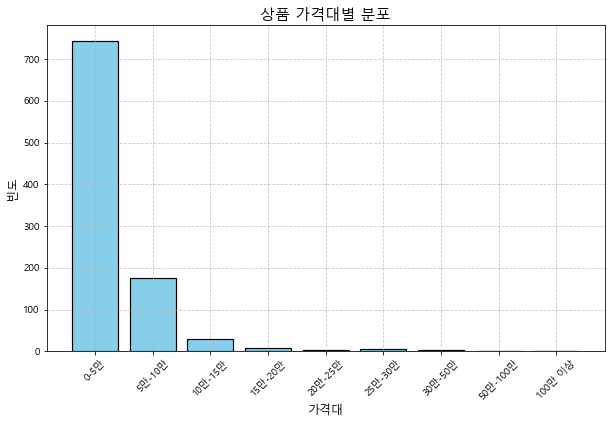

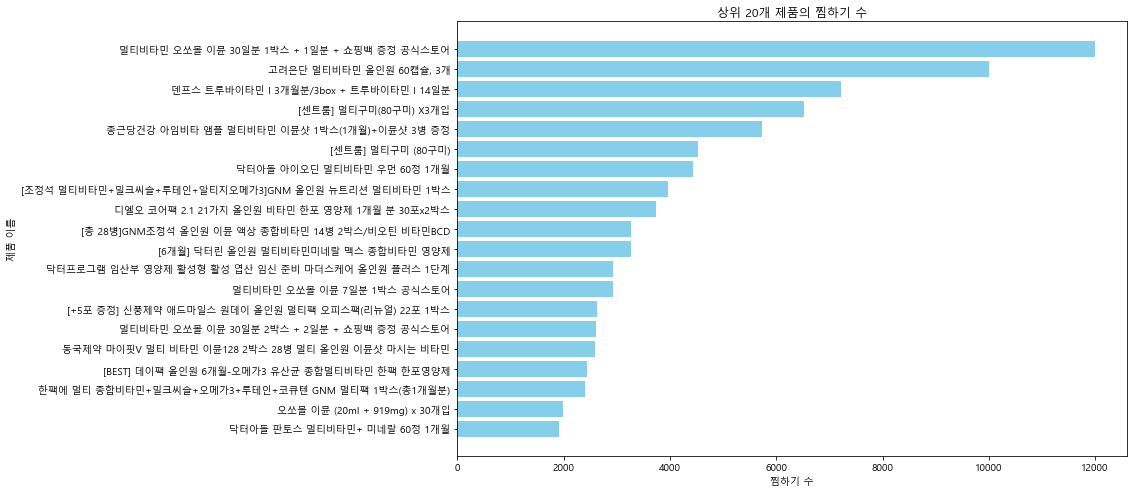

In [11]:
# 가격을 구간별로 나누기
price_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 500000, 1000000, float('inf')]
price_labels = ['0-5만', '5만-10만', '10만-15만', '15만-20만', '20만-25만', '25만-30만', '30만-50만', '50만-100만', '100만 이상']

# 가격을 구간별로 나눈 결과에 따라 빈도 계산
price_bins = pd.cut(df['가격'], bins=price_bins, labels=price_labels, right=False)
price_counts = price_bins.value_counts().sort_index()

# 막대 그래프로 가격대별 상품 빈도 시각화
plt.figure(figsize=(10, 6))
plt.bar(price_counts.index, price_counts.values, color='skyblue', edgecolor='black', linewidth=1.2)
plt.xlabel('가격대', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.title('상품 가격대별 분포', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10, rotation=45)  # 가격대 레이블을 45도 회전하여 가독성을 높임

# 찜하기 순위를 기준으로 정렬
df_sorted_by_likes = df.sort_values(by='찜하기', ascending=False).head(20)

# 찜하기 순위를 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
plt.barh(df_sorted_by_likes['이름'], df_sorted_by_likes['찜하기'], color='skyblue')
plt.xlabel('찜하기 수')
plt.ylabel('제품 이름')
plt.title('상위 20개 제품의 찜하기 수')
plt.gca().invert_yaxis()  # 상위 순으로 정렬하기 위해 y축 순서 뒤집기
plt.show()

In [12]:
# 사용자 입력을 받아 정렬 기준을 설정
sort_order = int(input("정렬 순서를 선택하세요 : 1.가격낮은순, 2.가격높은순, 3.찜적은순, 4.찜많은순, 5.리뷰적은순, 6.리뷰많은순\n"))
df[['가격', '찜하기']] = df[['가격', '찜하기']].apply(pd.to_numeric)

# 사용자의 선택에 따라 상품 정렬
if sort_order == 1:
    products_sorted = df.sort_values(by='가격', ascending=True)
elif sort_order == 2:
    products_sorted = df.sort_values(by='가격', ascending=False)
elif sort_order == 3:
    products_sorted = df.sort_values(by='찜하기', ascending=True)
elif sort_order == 4:
    products_sorted = df.sort_values(by='찜하기', ascending=False)
elif sort_order == 5:
    products_sorted = df.loc[::-1]
elif sort_order == 6:
    products_sorted = df
else:
    print("잘못된 입력입니다. 1, 2, 3 중에서 선택하세요.")

# 정렬된 상품들을 출력
products_sorted

정렬 순서를 선택하세요 : 1.가격낮은순, 2.가격높은순, 3.찜적은순, 4.찜많은순, 5.리뷰적은순, 6.리뷰많은순
1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,이름,이미지,링크,가격,찜하기,주요_기능성,원료명
22,발포비타민 독일 비타하임 멀티 비타민 20정 마시는 비타민,https://shopping-phinf.pstatic.net/main_117147...,https://cr.shopping.naver.com/adcr.nhn?x=AaRf0...,2700,308.0,피로회복,"비타민E, 비타민B1, 비타민B2, 비타민B6, 비타민C, 나이아신, 판토텐산, 엽..."
192,독일 비타하임 발포비타민 에너지음료 20정 물에 타먹는 발포정 마시는 비타민 C,https://shopping-phinf.pstatic.net/main_687302...,https://cr.shopping.naver.com/adcr.nhn?x=7TeVK...,2700,646.0,피로회복,"비타민E, 비타민B1, 비타민B2, , , , , , ,"
53,독일 잔티바 발포 종합비타민 멀티 비타민 E B6 B1 미네랄 마시는 액상 나이아신,https://shopping-phinf.pstatic.net/main_999141...,https://cr.shopping.naver.com/adcr.nhn?x=IDQ1j...,2700,86.0,영양보충,"비타민E, 비타민K, 비타민B1, , , , , , , , , ,"
1,고려은단 멀티비타민 올인원 1560mg x 60캡슐,https://shopping-phinf.pstatic.net/main_254143...,https://cr.shopping.naver.com/adcr.nhn?x=VGGdp...,4790,1737.0,영양보충,"비타민A, 비타민D, 비타민E, 비타민K, 비타민B1, 비타민B2, 비타민B6, 비..."
1326,비타하임 발포 멀티비타민 오렌지맛 4500mg x 20캡슐,https://shopping-phinf.pstatic.net/main_572022...,https://cr.shopping.naver.com/adcr.nhn?x=kb7mo...,5000,19.0,영양보충,"비타민E, 비타민B1, 비타민B2, 비타민B12, 비타민C, 나이아신, 판토텐산, ..."
...,...,...,...,...,...,...,...
802,함소아 하마비타민 영양가득 주니어 1200mg x 120정,https://shopping-phinf.pstatic.net/main_165096...,https://cr.shopping.naver.com/adcr.nhn?x=QWH7t...,300000,0.0,영양보충,"비타민A, 비타민D, 비타민E, 비타민B1, 비타민B2, 비타민B6, 비타민C, 나..."
1091,하이뮨 멀티비타민&미네랄 NCS 500mg x 120캡슐,https://shopping-phinf.pstatic.net/main_267586...,https://cr.shopping.naver.com/adcr.nhn?x=J%2Fj...,361000,4.0,영양보충,"비타민D, 비타민B1, 비타민B2, 비타민B6, 비타민B12, 비타민C, 나이아신,..."
233,멀티비타민 오쏘몰 이뮨 30일분 3박스(90일분) + 쇼핑백 증정 공식스토어,https://shopping-phinf.pstatic.net/main_832286...,https://cr.shopping.naver.com/adcr.nhn?x=MqlCW...,367600,669.0,영양보충,"비타민D, 비타민E, 비타민K, 비타민B1, 비타민B2, 비타민B6, 비타민C, 판..."
948,(3통)종합비타민 엠파워플러스 타임96 북미 수험생영양제 뇌건강 멀티비타민 Time96,https://shopping-phinf.pstatic.net/main_822013...,https://cr.shopping.naver.com/adcr.nhn?x=NvMz5...,390000,90.0,영양보충,"비타민A, 비타민D, 비타민E, 비타민K, 비타민B1, 비타민B2, 비타민B6, 비..."
